# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - soft-drinks


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot

Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


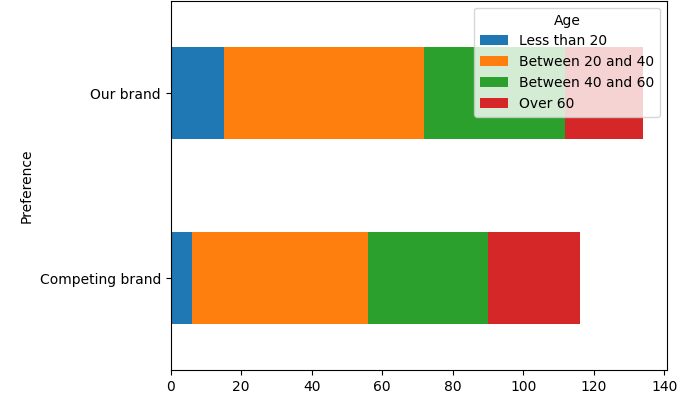



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

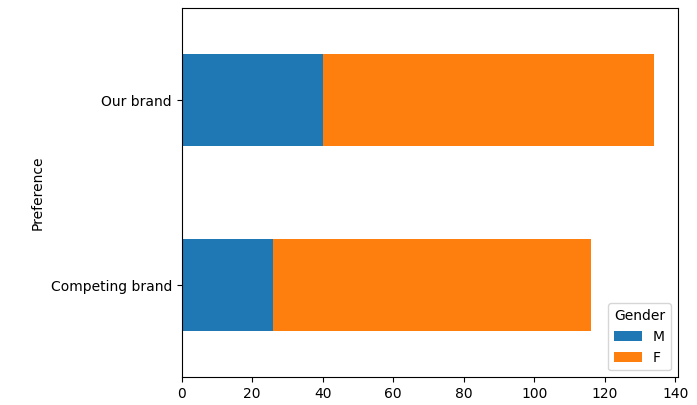

In [5]:
softdrinks = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv', sep=";")
softdrinks.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


### Age vs Brand

In [6]:
observed = pd.crosstab(softdrinks.Age, softdrinks.Preference)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)


Chi-squared       : 3.8589
Degrees of freedom: 3
P-value           : 0.2771


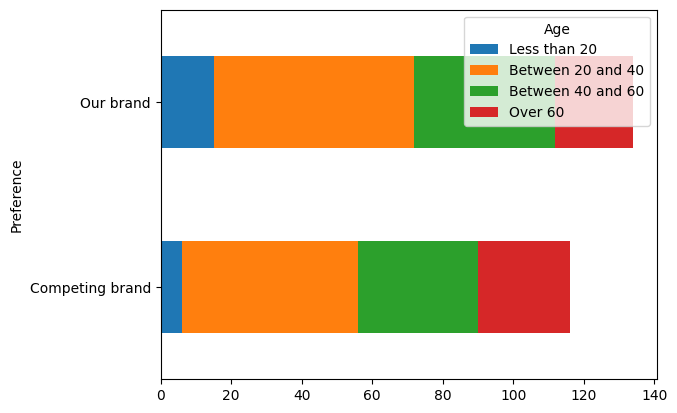

In [ ]:
softdrinks.Age = softdrinks.Age.astype(CategoricalDtype(categories=['Less than 20', 'Between 20 and 40', 'Between 40 and 60', 'Over 60'], ordered=True))
observed_p = pd.crosstab(softdrinks.Preference, softdrinks.Age)

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

### Gender vs Brand

In [14]:
observed = pd.crosstab(softdrinks.Gender, softdrinks.Preference)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


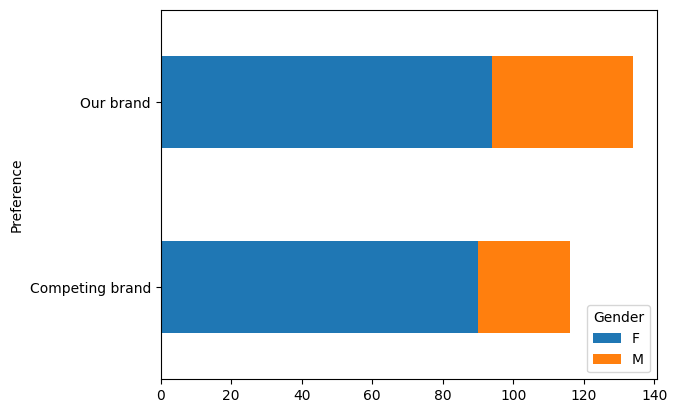

In [15]:
observed_p = pd.crosstab(softdrinks.Preference, softdrinks.Gender)

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);